### Visualization of different variables of used Audi cars dataset
**Dataset Source:** https://www.kaggle.com/aishwaryamuthukumar/cars-dataset-audi-bmw-ford-hyundai-skoda-vw 

**Dataset**: Dataset of used Audi cars along with their feature variables such as
1. **model**- model of the car
2. **year**	- year of manufacturing 
3. **price**- price of the used car
4. **transmission**- transmission mode of the car
4. **mileage**- mileage of the car
5. **fuelType**- type of fuel the car runs on 	
6. **mpg**-	mile covered by the car per gallon of fuel 
7. **engineSize**- engine size of the car

### Importing the libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# to remove unnecessary warnings
import warnings

warnings.filterwarnings('ignore')

### Read the csv file for importing the dataset

In [3]:
df=pd.read_csv("audi.csv")

#display the dataset ; top 3 observations are displayed here
display(df.head(3))

#look into the dataset to find out missing/incorrect values,observation and column number, variable types, etc  
# display(df.info())

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,55.4,1.4


In [4]:
# the column names
print(df.columns)

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'mpg',
       'engineSize'],
      dtype='object')


### Setting feature and target variables

In [5]:
features = ['mileage', 'year', 'mpg', 'engineSize']
target = ['price']

X = df[features]
y = df[target]
display(X.head(5))
# shape of each variable dataset
print('shape of feature variable dataset:',X.shape)
print('shape of target variable dataset:',y.shape)

,mileage,year,mpg,engineSize
0,15735,2017,55.4,1.4
1,36203,2016,64.2,2.0
2,29946,2016,55.4,1.4
3,25952,2017,67.3,2.0
4,1998,2019,49.6,1.0


shape of feature variable dataset: (10668, 4)
shape of target variable dataset: (10668, 1)


### Splitting the train and test dataset

In [6]:
# X_train = feature variable training dataset
# X_test = feature variable testing dataset
# y_train = target variable training dataset
# y_test = target variable testing dataset
# test-size = 0.2 implies 20% of dataset being used to testing, rest for training the model.
# random_state = used for fixing the set of dataset used for training and testing for everytime the code runs.  
# any number can be assigned to random_state, 42 is commonly used.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#shape of feature and target variable dataset of the training and testing dataset.
print('shape of training feature variables dataset:',X_train.shape)
print('shape of testing feature variables dataset:',X_test.shape)
print('shape of training target variables dataset:', y_train.shape)
print('shape of testing target variables dataset:',y_test.shape)

shape of training feature variables dataset: (8534, 4)
shape of testing feature variables dataset: (2134, 4)
shape of training target variables dataset: (8534, 1)
shape of testing target variables dataset: (2134, 1)


### Instantiating and fitting the model with Linear Regression

In [7]:
model = LinearRegression()

#training feature and target variables used for model training
model = model.fit(X_train, y_train)

#### Predicting target variable (price) 

In [8]:
y_pred = model.predict(X_test)
print('the predicted price:\n')
print(y_pred)

the predicted price:

[[ 8404.61685932]
 [25242.08315391]
 [29769.42539605]
 ...
 [15223.19196191]
 [25409.82306727]
 [12240.88891797]]


In [9]:
print('the actual price:\n')
print(y_test)

the actual price:

       price
10442   9990
2907   22382
7388   28990
3016   30777
7890   14950
...      ...
8606   31450
8977   12900
3673   16750
1034   21996
6867    9547

[2134 rows x 1 columns]


#### Comparing the actual and predicted price (for a few)
- For the first car, the predicted price is lesser than the actual price<br>
- Whereas for the next two cars, the predicted price is higher than the actual price

### Root Mean Squared Error

In [10]:
# Root Mean Squared Error = standard deviation of the residual

RMSE = mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean Squared Error, RMSE:',RMSE)

Root Mean Squared Error, RMSE: 5719.124258888187


#### Observation
From the root mean squared error, we get that, on an average, the predicted price is either 5700 USD more or less than the actual price, for this particular model.

### One Hot Encoding 

In [11]:
df = pd.get_dummies(df, drop_first=True)
print(df.shape)

(10668, 34)


In [12]:
target = ['price']
y = df[target]
X = df.drop('price', axis=1)
print('shape of feature variable dataset:',X.shape)
print('shape of target variable dataset:',y.shape)

shape of feature variable dataset: (10668, 33)
shape of target variable dataset: (10668, 1)


- *Assigned the dataset as feature after dropping the target variable since there are 34 (too many) features to include.*

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8534, 33) (2134, 33) (8534, 1) (2134, 1)


In [14]:
model = LinearRegression()
model = model.fit(X_train, y_train)

###  Coefficients of linear regression model for each feature and its y-intercept value 

In [15]:
coefficients = pd.DataFrame( {'features' : X.columns, 'coefficients' : np.squeeze(model.coef_)} )
coefficients = coefficients.sort_values( by='coefficients' )
display(coefficients)

y_intercept = model.intercept_
print('\ny intercept:', y_intercept)

,features,coefficients
29,transmission_Manual,-1.205987e+03
32,fuelType_Petrol,-4.139250e+02
2,mpg,-1.692461e+02
1,mileage,-7.609565e-02
21,model_ RS7,1.111403e-09
30,transmission_Semi-Auto,1.048772e+02
11,model_ Q2,7.336904e+02
5,model_ A3,1.289843e+03
24,model_ S5,1.295996e+03
6,model_ A4,1.594688e+03



y intercept: [-4060707.74307608]


> **positive coefficient** = the **target** variable **increases** with the **increasing feature** variable<br>
> **negative coefficient** = the **target** variable **decreases** with the **increasing feature** variable

In [16]:
y_pred = model.predict(X_test)

In [17]:
# mean absolute error
MAE = mean_absolute_error(y_test, y_pred)
print("mean absolute error, MAE = ", MAE)

# mean absolute percentage error: : lower is better
MAPE = mean_absolute_percentage_error(y_test, y_pred)
print("mean absolute percentage error, MAPE = ", MAPE)

# mean squared error
MSE = mean_squared_error(y_test, y_pred)
print("mean squared error, MSE = ", MSE)

# root mean squared error
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print("root mean squared error, RMSE = ", RMSE)

# coefficient of determination
r_squared = r2_score(y_test, y_pred) 
print("coefficient of determination, r_squared = ", r_squared)

mean absolute error, MAE =  2720.087568599515
mean absolute percentage error, MAPE =  0.13502741779458385
mean squared error, MSE =  17229727.46218719
root mean squared error, RMSE =  4150.87068723987
coefficient of determination, r_squared =  0.8859936175487338


#### Observation
- The **MAPE** is .135 i.e. **13.5%** , which looks good for a model
- The **RMSE** value **decreased to 4150** from 5700 USD
- The **Coefficient of determination**'s value towards 1 is considered good, it is **.8859** i.e. 88.6% for this particular model. 

### Visualizing the actual and predicted target

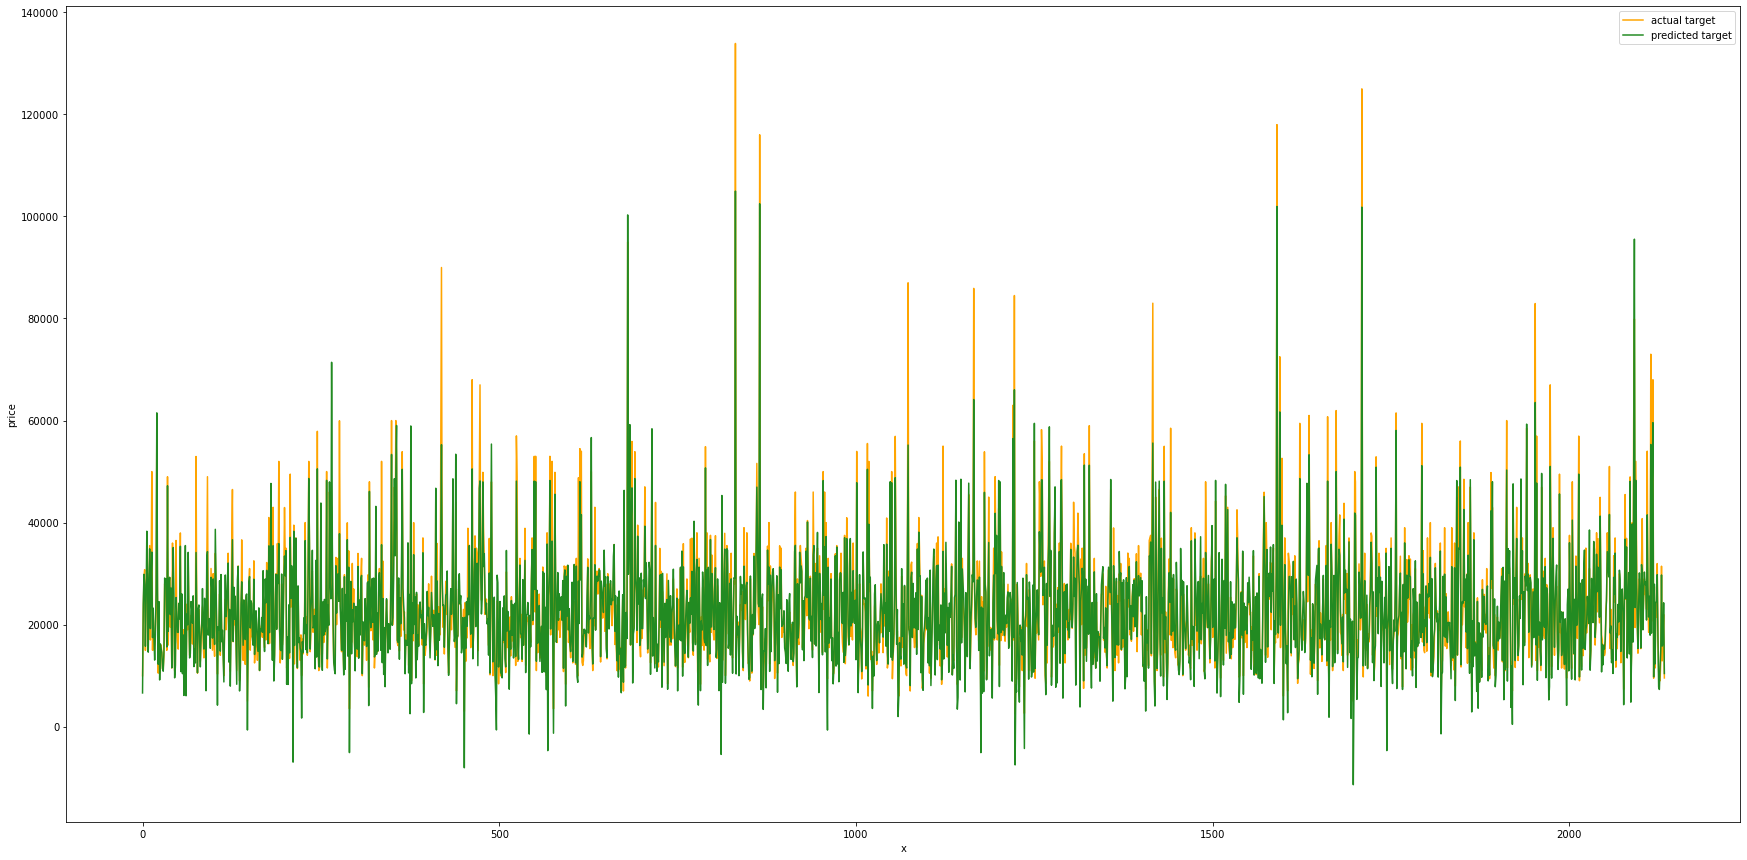

In [18]:
y_test['pred'] = y_pred
y_test['x'] = np.arange(0, y_test.shape[0], 1).tolist()

plt.figure(figsize=(30,15))

sns.lineplot(x='x', y='price', data=y_test, label='actual target', color = 'orange')
sns.lineplot(x='x', y='pred', data=y_test, label='predicted target', color = 'forestgreen')

plt.show()

#### Observation
From the lineplot we can see that quite a major portion of the predicted prices are lesser than the actual price

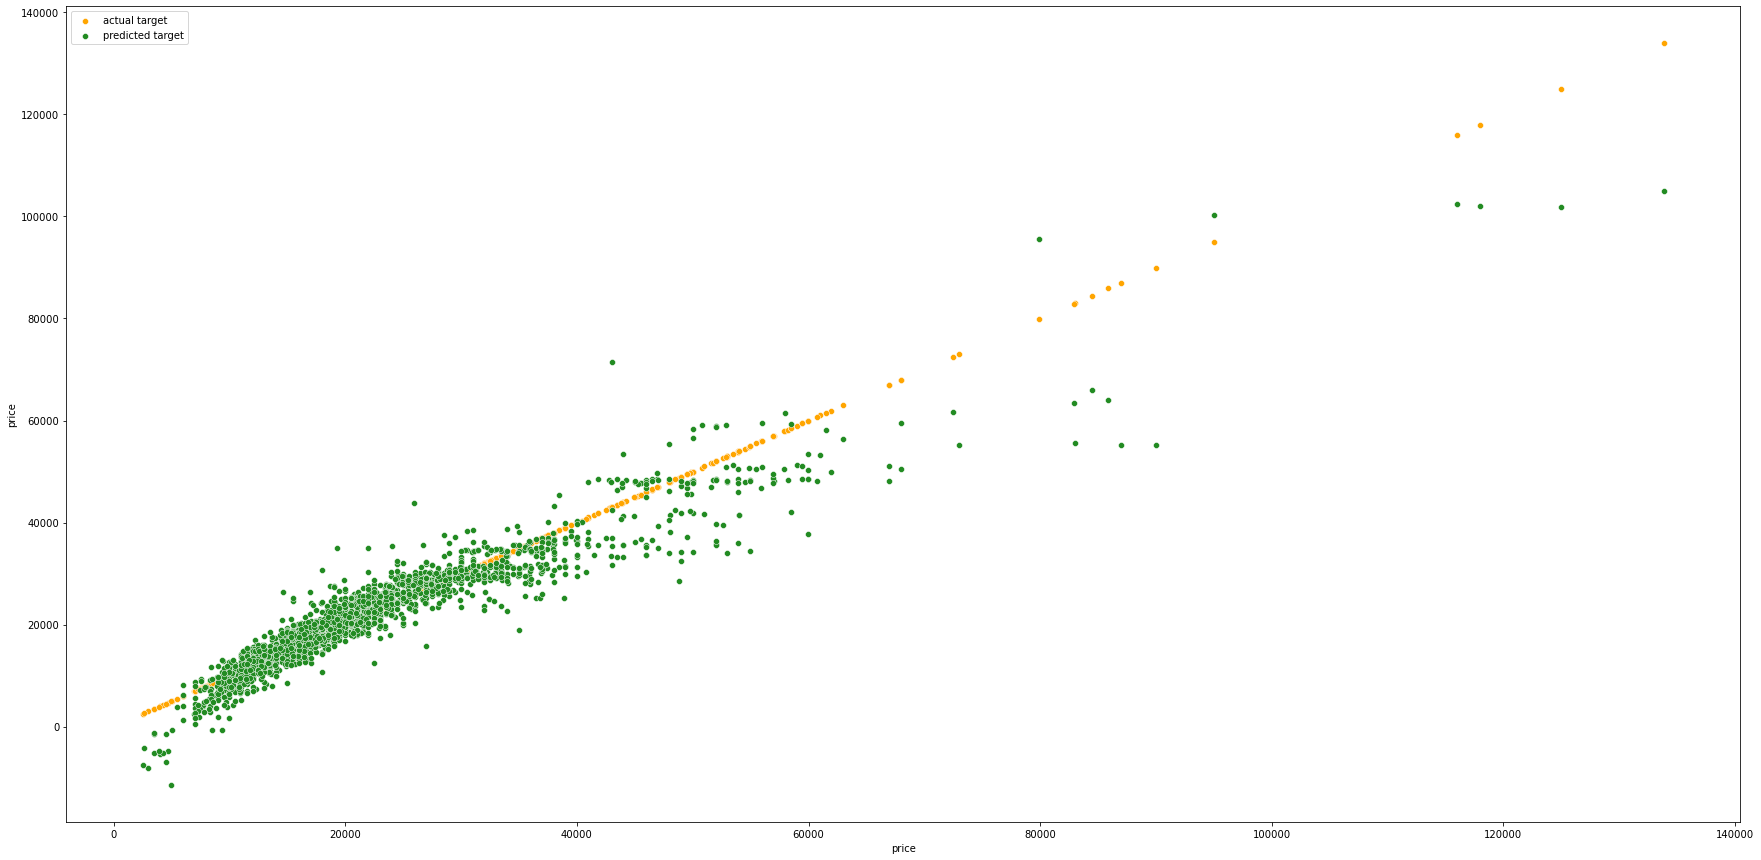

In [19]:
plt.figure(figsize=(30,15))

sns.scatterplot(x = 'price', y = 'price', label='actual target', data = y_test, color = 'orange')
sns.scatterplot(x = 'price', y = 'pred', data = y_test, label='predicted target', color = 'forestgreen')

plt.show()

#### Observation
From the scatterplot we can see that the predictation only for the price range 5000 to 40000 USD is acceptable. The higher prices are poorly predicted. And the lower prices are predicted as negative price, which is not justifiable.

##### From the error calculation and visualization of the predicted and actual price, we can conclude that the model needs to be improved.